Band: Band 7
Beam size: BMAJ = 0.06 arcsec, BMIN = 0.05 arcsec
Estimated RMS noise: 0.00077 Jy/beam


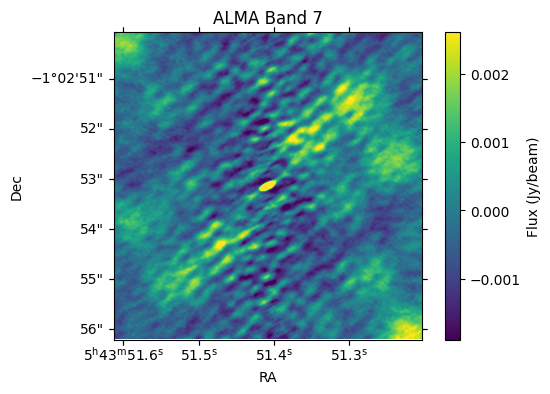

In [19]:
# Import required libraries
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
from astropy.wcs import FITSFixedWarning
warnings.simplefilter('ignore', category=FITSFixedWarning)

# Load the FITS file
filename = "C:/Users/maitr/Downloads/member.uid___A001_X2de_X42.X3af_cont_TEST_2.flux.image.pbcor.fits"
hdulist = fits.open(filename)
image_data = hdulist[0].data.squeeze()  
header = hdulist[0].header

# Extract beam size and convert to arcseconds
bmaj_deg = header.get('BMAJ', np.nan)  # in degrees
bmin_deg = header.get('BMIN', np.nan)
bmaj_arcsec = bmaj_deg * 3600 if bmaj_deg else None
bmin_arcsec = bmin_deg * 3600 if bmin_deg else None

# Extract Band (if keyword exists)
band = header.get('RESTFRQ', None)  # (in Hertz) often used to deduce band
if band:
    if 84e9 <= band < 116e9:
        band_name = "Band 3"
    elif 125e9 <= band < 163e9:
        band_name = "Band 4"
    elif 163e9 <= band < 211e9:
        band_name = "Band 5"
    elif 211e9 <= band < 275e9:
        band_name = "Band 6"
    elif 275e9 <= band < 373e9:
        band_name = "Band 7"
    elif 602e9 <= band < 720e9:
        band_name = "Band 9"
    else:
        band_name = "Unknown"
else:
    band_name = "Not Found"

print(f"Band: {band_name}")
print(f"Beam size: BMAJ = {bmaj_arcsec:.2f} arcsec, BMIN = {bmin_arcsec:.2f} arcsec")

# Measure RMS noise (sigma from pixel distribution)
# Use robust method: e.g., pixels outside source area
flattened = image_data.flatten()
flattened = flattened[~np.isnan(flattened)]  # remove NaNs
rms = np.std(flattened[np.abs(flattened) < 5 * np.std(flattened)]) 
print(f"Estimated RMS noise: {rms:.5f} Jy/beam")

# Cell 5: Plot the image
wcs = WCS(header).celestial
plt.figure(figsize=(6, 4))
ax = plt.subplot(projection=wcs)
norm = simple_norm(image_data, 'linear', percent=99.5)
plt.imshow(image_data, origin='lower', cmap='viridis', norm=norm)
plt.xlabel("RA")
plt.ylabel("Dec")
plt.colorbar(label='Flux (Jy/beam)')
plt.title(f"ALMA {band_name}")
plt.show()

Band: Band 6
Beam size: BMAJ = 0.03 arcsec, BMIN = 0.02 arcsec
Estimated RMS noise: 0.00003 Jy/beam


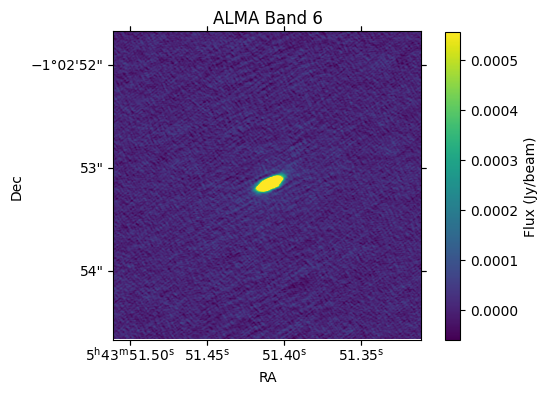

In [15]:
# Import required libraries
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
from astropy.wcs import FITSFixedWarning
warnings.simplefilter('ignore', category=FITSFixedWarning)

# Load the FITS file
filename = "C:/Users/maitr/Downloads/member.uid___A001_X1284_X17b8.HH_212_sci.spw25_27_29_31.cont.I.manual.pbcor.fits"
hdulist = fits.open(filename)
image_data = hdulist[0].data.squeeze()  # squeeze to remove singleton axes
header = hdulist[0].header

# Extract beam size and convert to arcseconds
bmaj_deg = header.get('BMAJ', np.nan)  # in degrees
bmin_deg = header.get('BMIN', np.nan)
bmaj_arcsec = bmaj_deg * 3600 if bmaj_deg else None
bmin_arcsec = bmin_deg * 3600 if bmin_deg else None

# Extract Band (if keyword exists)
band = header.get('RESTFRQ', None)  # often used to deduce band
if band:
    if 84e9 <= band < 116e9:
        band_name = "Band 3"
    elif 125e9 <= band < 163e9:
        band_name = "Band 4"
    elif 163e9 <= band < 211e9:
        band_name = "Band 5"
    elif 211e9 <= band < 275e9:
        band_name = "Band 6"
    elif 275e9 <= band < 373e9:
        band_name = "Band 7"
    else:
        band_name = "Unknown"
else:
    band_name = "Not Found"

print(f"Band: {band_name}")
print(f"Beam size: BMAJ = {bmaj_arcsec:.2f} arcsec, BMIN = {bmin_arcsec:.2f} arcsec")

# Measure RMS noise (sigma from pixel distribution)
# Use robust method: e.g., pixels outside source area
flattened = image_data.flatten()
flattened = flattened[~np.isnan(flattened)]  # remove NaNs
rms = np.std(flattened[np.abs(flattened) < 5 * np.std(flattened)])  # sigma clipping
print(f"Estimated RMS noise: {rms:.5f} Jy/beam")

# Cell 5: Plot the image
wcs = WCS(header).celestial
plt.figure(figsize=(6, 4))
ax = plt.subplot(projection=wcs)
norm = simple_norm(image_data, 'linear', percent=99.5)
plt.imshow(image_data, origin='lower', cmap='viridis', norm=norm)
plt.xlabel("RA")
plt.ylabel("Dec")
plt.colorbar(label='Flux (Jy/beam)')
plt.title(f"ALMA {band_name}")
plt.show()

Band: Band 3
Beam size: BMAJ = 0.05 arcsec, BMIN = 0.04 arcsec
Estimated RMS noise: 0.00001 Jy/beam


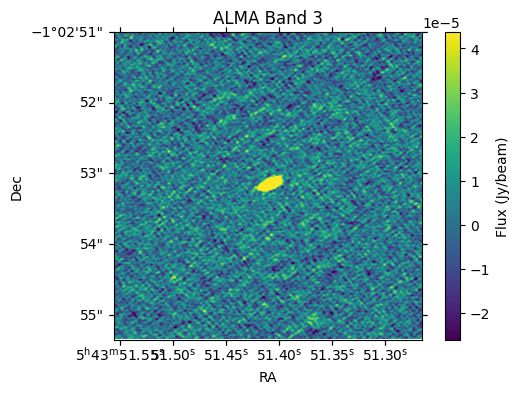

In [16]:
# Import required libraries
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
from astropy.wcs import FITSFixedWarning
warnings.simplefilter('ignore', category=FITSFixedWarning)

# Load the FITS file
filename = "C:/Users/maitr/Downloads/member.uid___A001_X1284_X17be.HH_212_sci.spw25_27_29_31.mfs.I.manual.pbcor.fits"
hdulist = fits.open(filename)
image_data = hdulist[0].data.squeeze()  # squeeze to remove singleton axes
header = hdulist[0].header

# Extract beam size and convert to arcseconds
bmaj_deg = header.get('BMAJ', np.nan)  # in degrees
bmin_deg = header.get('BMIN', np.nan)
bmaj_arcsec = bmaj_deg * 3600 if bmaj_deg else None
bmin_arcsec = bmin_deg * 3600 if bmin_deg else None

# Extract Band (if keyword exists)
band = header.get('RESTFRQ', None)  # often used to deduce band
if band:
    if 84e9 <= band < 116e9:
        band_name = "Band 3"
    elif 125e9 <= band < 163e9:
        band_name = "Band 4"
    elif 163e9 <= band < 211e9:
        band_name = "Band 5"
    elif 211e9 <= band < 275e9:
        band_name = "Band 6"
    elif 275e9 <= band < 373e9:
        band_name = "Band 7"
    else:
        band_name = "Unknown"
else:
    band_name = "Not Found"

print(f"Band: {band_name}")
print(f"Beam size: BMAJ = {bmaj_arcsec:.2f} arcsec, BMIN = {bmin_arcsec:.2f} arcsec")

# Measure RMS noise (sigma from pixel distribution)
# Use robust method: e.g., pixels outside source area
flattened = image_data.flatten()
flattened = flattened[~np.isnan(flattened)]  # remove NaNs
rms = np.std(flattened[np.abs(flattened) < 5 * np.std(flattened)])  # sigma clipping
print(f"Estimated RMS noise: {rms:.5f} Jy/beam")

# Cell 5: Plot the image
wcs = WCS(header).celestial
plt.figure(figsize=(6, 4))
ax = plt.subplot(projection=wcs)
norm = simple_norm(image_data, 'linear', percent=99.5)
plt.imshow(image_data, origin='lower', cmap='viridis', norm=norm)
plt.xlabel("RA")
plt.ylabel("Dec")
plt.colorbar(label='Flux (Jy/beam)')
plt.title(f"ALMA {band_name}")
plt.show()

Band: Band 9
Beam size: BMAJ = 0.09 arcsec, BMIN = 0.07 arcsec
Estimated RMS noise: 0.34309 Jy/beam


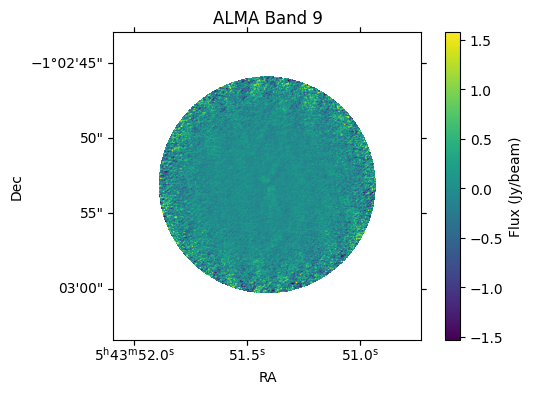

In [20]:
# Import required libraries
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
from astropy.wcs import FITSFixedWarning
warnings.simplefilter('ignore', category=FITSFixedWarning)

# Load the FITS file
filename = "C:/Users/maitr/Downloads/member.uid___A002_X7b15a9_X5e.calibrated.ms.contsub.line.spw0.image.pbcor.fits"
hdulist = fits.open(filename)
image_data = hdulist[0].data.squeeze()  # squeeze to remove singleton axes
header = hdulist[0].header

# Extract beam size and convert to arcseconds
bmaj_deg = header.get('BMAJ', np.nan)  # in degrees
bmin_deg = header.get('BMIN', np.nan)
bmaj_arcsec = bmaj_deg * 3600 if bmaj_deg else None
bmin_arcsec = bmin_deg * 3600 if bmin_deg else None

# Extract Band (if keyword exists)
band = header.get('RESTFRQ', None)  # often used to deduce band
if band:
    if 84e9 <= band < 116e9:
        band_name = "Band 3"
    elif 125e9 <= band < 163e9:
        band_name = "Band 4"
    elif 163e9 <= band < 211e9:
        band_name = "Band 5"
    elif 211e9 <= band < 275e9:
        band_name = "Band 6"
    elif 275e9 <= band < 373e9:
        band_name = "Band 7"
    elif 602e9 <= band < 720e9:
        band_name = "Band 9"
    else:
        band_name = "Unknown"
else:
    band_name = "Not Found"

print(f"Band: {band_name}")
print(f"Beam size: BMAJ = {bmaj_arcsec:.2f} arcsec, BMIN = {bmin_arcsec:.2f} arcsec")

# Measure RMS noise (sigma from pixel distribution)
# Use robust method: e.g., pixels outside source area
flattened = image_data.flatten()
flattened = flattened[~np.isnan(flattened)]  # remove NaNs
rms = np.std(flattened[np.abs(flattened) < 5 * np.std(flattened)])  # sigma clipping
print(f"Estimated RMS noise: {rms:.5f} Jy/beam")

# Cell 5: Plot the image
wcs = WCS(header).celestial
# Select a single channel (e.g., middle one)
image_slice = image_data[50]  # Index 80 of 160

# Plot the selected 2D slice
wcs_slice = WCS(header).celestial  # WCS may still work if spatial axes are last two
plt.figure(figsize=(6, 4))
ax = plt.subplot(projection=wcs_slice)
norm = simple_norm(image_slice, 'linear', percent=99.5)
im = ax.imshow(image_slice, origin='lower', cmap='viridis', norm=norm)
plt.xlabel("RA")
plt.ylabel("Dec")
plt.title(f"ALMA {band_name}")
plt.colorbar(im, ax=ax, label='Flux (Jy/beam)')
plt.show()
